In [1]:
#モジュールのインポートとワークブックの取得

import openpyxl
import pprint
from scipy.fftpack import fft
import numpy as np


wb = openpyxl.load_workbook('matome.xlsx')
sn = wb.sheetnames

print("successed!")

successed!


In [13]:
import math

wave = np.empty(sheet.max_row-3-57)
rate = np.empty(sheet.max_row-3-57)

for i in range(len(sn)):
    sheet = wb.get_sheet_by_name(sn[i])
    print("reading " + sn[i] , end="")

    for row in range(58,sheet.max_row-2): #データのある行からwave値を取得
        wave[row-58] = sheet['c'+str(row)].value
        rate[row-58] = (row-58)/10
        if row%10000==0:
            print("." , end="")
    wavef = fft(wave) #フーリエ変換→np複素数
    print("successed")

    print("writing " + sn[i] + " fftresult" , end="")
    sheet['d57'] = "周波数[Hz]"
    sheet['e57'] = "フーリエ解析結果[dB]"
    for row in range(58,sheet.max_row-2):#D,E列に書き込み
        sheet['D'+str(row)] = rate[row-58]
        sheet['E'+str(row)] = 20*math.log10(np.abs(wavef[row-58])*2/50000)
        if row%10000==0:
            print("." , end="")
    print("successed")
    
print("saving...",end="")
wb.save('matome.xlsx')
print("successed")


reading アンバランス1005rpm.....successed
writing アンバランス1005rpm fftresult.....successed
reading アンバランス1483rpm.....successed
writing アンバランス1483rpm fftresult.....successed
reading アンバランス500rpm.....successed
writing アンバランス500rpm fftresult.....successed
reading ギア1004rpm.....successed
writing ギア1004rpm fftresult.....successed
reading ギア1476rpm.....successed
writing ギア1476rpm fftresult.....successed
reading ギア502rpm.....successed
writing ギア502rpm fftresult.....successed
reading 健全1005rpm.....successed
writing 健全1005rpm fftresult.....successed
reading 健全1484rpm.....successed
writing 健全1484rpm fftresult.....successed
reading 健全507rpm.....successed
writing 健全507rpm fftresult.....successed
reading 異常（外傷）1482rpm.....successed
writing 異常（外傷）1482rpm fftresult.....successed
reading 異常（外傷）496rpm.....successed
writing 異常（外傷）496rpm fftresult.....successed
reading 異常（外傷）998rpm.....successed
writing 異常（外傷）998rpm fftresult.....successed
reading 自作異常（外輪と転動体1個）1002rpm.....successed
writing 自作異常（外輪と転動体1個）1002rpm 

In [35]:
max = 0.
min = 0.
print("Amplitude...",end="")

for i in range(len(sn)):
    max = 0.
    min = 0.
    sheet = wb.get_sheet_by_name(sn[i])
    for row in range(58,sheet.max_row-2):
        if max < float(sheet['c'+str(row)].value):
            max = float(sheet['c'+str(row)].value)
        if min > float(sheet['c'+str(row)].value):
            min = float(sheet['c'+str(row)].value)
    sheet["e52"] = "振幅"
    sheet["f52"] = max-min

print("successed")

Amplitude...successed


In [36]:
#RMS
print("RMS...",end="")
rms = 0.
for i in range(len(sn)):
    sheet = wb.get_sheet_by_name(sn[i])
    for row in range(58,sheet.max_row-2):
        rms = rms + float(sheet['c'+str(row)].value)**2
    rms = math.sqrt(rms/(sheet.max_row-58))
    sheet["e53"] = "RMS"
    sheet["f53"] = rms

print("successed")

RMS...successed


In [22]:
#波高率
print("波高率...",end="")
for i in range(len(sn)):
    sheet = wb.get_sheet_by_name(sn[i])
    sheet["e54"] = "波高率"
    sheet["f54"] = float(sheet["f52"].value)/float(sheet["f53"].value)
print("successed")

波高率...successed


In [37]:
#尖度、歪度
print("senndowaido...",end="")
ave = 0.
sd = 0.
wai = 0.
sen = 0.
num = sheet.max_row-58
for i in range(len(sn)):
    sheet = wb.get_sheet_by_name(sn[i])
    for row in range(58,sheet.max_row-2):
        ave = ave + float(sheet['c'+str(row)].value)
    ave = ave/num
    
    for row in range(58,sheet.max_row-2):
        sd = sd + (float(sheet['c'+str(row)].value)-ave)**2
    sd = math.sqrt(sd/num)
    
    for row in range(58,sheet.max_row-2):
        wai = wai + ((float(sheet['c'+str(row)].value)-ave)/sd)**3
    wai = num/((num-1)*(num-2))*wai
    
    for row in range(58,sheet.max_row-2):
        sen = sen + ((float(sheet['c'+str(row)].value)-ave)/sd)**4
    sen = num*(num+1)/((num-1)*(num-2)*(num-3))*sen - 3*(num-1)**2/((num-2)*(num-3))
    
    sheet["e55"] = "歪度"
    sheet["f55"] = wai
    sheet["e56"] = "尖度"
    sheet["f56"] = sen
    

print("successed")


senndowaido...successed


In [40]:
#ソート
for i in range(len(sn)):
    sheet = wb.get_sheet_by_name(sn[i])
    print("reading and sorting" + sn[i] , end="")
    wavef_rate = np.array([[0,0],])
    for row in range(58,(sheet.max_row-2)//2): #データのある行からwavef値を取得(ナイキスト周波数まで)
        a= np.array([sheet['d'+str(row)].value , sheet['e'+str(row)].value],)
        wavef_rate = np.vstack((wavef_rate, a))
        if row%5000==0:
            print("." , end="")
    wavef_rate_sort = wavef_rate[np.argsort(wavef_rate[: , 1])[::-1]]
    print("successed")

    print("writing " + sn[i] + " sortresult" , end="")
    sheet['f57'] = "ソート周波数[Hz]"
    sheet['g57'] = "ソートフーリエ解析結果[dB]"
    for row in range(57,(sheet.max_row-2)//2):#F,G列に書き込み
        sheet['f'+str(row)] = wavef_rate_sort[row-58,0]
        sheet['g'+str(row)] = wavef_rate_sort[row-58,1]
        if row%5000==0:
            print("." , end="")
    print("successed")
    
print("saving...",end="")
wb.save('matome_kaiseki.xlsx')
print("successed")

reading and sortingアンバランス1005rpm.....successed
writing アンバランス1005rpm sortresult.....successed
reading and sortingアンバランス1483rpm.....successed
writing アンバランス1483rpm sortresult.....successed
reading and sortingアンバランス500rpm.....successed
writing アンバランス500rpm sortresult.....successed
reading and sortingギア1004rpm.....successed
writing ギア1004rpm sortresult.....successed
reading and sortingギア1476rpm.....successed
writing ギア1476rpm sortresult.....successed
reading and sortingギア502rpm.....successed
writing ギア502rpm sortresult.....successed
reading and sorting健全1005rpm.....successed
writing 健全1005rpm sortresult.....successed
reading and sorting健全1484rpm.....successed
writing 健全1484rpm sortresult.....successed
reading and sorting健全507rpm.....successed
writing 健全507rpm sortresult.....successed
reading and sorting異常（外傷）1482rpm.....successed
writing 異常（外傷）1482rpm sortresult.....successed
reading and sorting異常（外傷）496rpm.....successed
writing 異常（外傷）496rpm sortresult.....successed
reading and sorting異常（

In [38]:
print("saving...",end="")
wb.save('matome_kaiseki.xlsx')
print("successed")

saving...successed


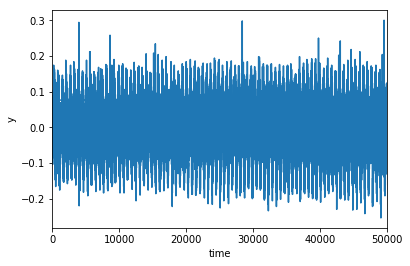

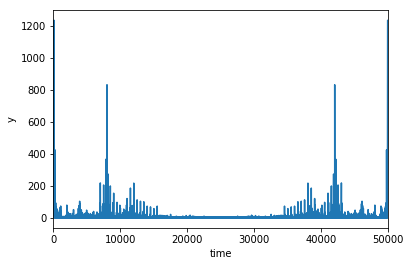

In [55]:
import matplotlib.pyplot as plt

# 時系列データ
plt.figure(1)
plt.plot(time, wave)
plt.xlim(0, 50000)
plt.xlabel("time")
plt.ylabel("y")

plt.show()

# 大きさ、位相
plt.figure(1)
plt.plot(time, np.abs(wavef))
plt.xlim(0, 50000)
plt.xlabel("time")
plt.ylabel("y")

plt.show()



In [57]:
wavef[500]

(1.1221542377382774+19.864453941003752j)